# Daft.ie data wrangling

<p>In this notebook we will work with the data of the of houses publisheds in the month of January 2022 in the website <a href="https://www.daft.ie/">Daft.ie</a>.</p>
<p>The data used was extracted from a <a href="https://www.kaggle.com/datasets/eavannan/daftie-house-price-data">Kaggle dataset</a>.</p>

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [405]:
# Read CSV file without setting any column as the index
df = pd.read_csv("daft_data_01_2022.csv", index_col=False)

In [406]:
df.head()

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,m_totalImages,m_hasVideo,m_hasVirtualTour,m_hasBrochure,ber_rating,longitude,latitude
0,3626025,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,Roy Dennehy,Dennehy Auctioneers,BRANDED_AGENT,16.0,False,False,False,C2,-8.382500,51.822940
1,3675175,"58 The Glen, Kilnacourt Woods, Portarlington, ...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,...,Marie Kiernan,Tom McDonald & Associates,BRANDED_AGENT,33.0,False,False,False,C1,-7.177098,53.157465
2,3673450,"16 Dodderbrook Park, Ballycullen, Dublin 24",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,...,Moovingo,Moovingo,BRANDED_AGENT,38.0,False,True,False,A3,-6.342763,53.269493
3,3649708,"31 Lissanalta Drive, Dooradoyle, Co. Limerick",featured,2022-01-28,299000,3,3,Semi-D,NaN,Buy,...,DNG Cusack Dunne,DNG Cusack Dunne,BRANDED_AGENT,22.0,False,False,False,C2,-8.640716,52.629588
4,3643947,"5 Columba Terrace, Kells, Co. Meath",featured,2022-01-28,120000,3,1,Terrace,68.0,Buy,...,REA T&J Gavigan,REA T & J Gavigan,BRANDED_AGENT,5.0,False,False,False,G,-6.879797,53.728601


In [407]:
# Checking df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3967 non-null   int64  
 1   title             3967 non-null   object 
 2   featuredLevel     3967 non-null   object 
 3   publishDate       3967 non-null   object 
 4   price             3967 non-null   int64  
 5   numBedrooms       3967 non-null   int64  
 6   numBathrooms      3967 non-null   int64  
 7   propertyType      3967 non-null   object 
 8   propertySize      3612 non-null   float64
 9   category          3967 non-null   object 
 10  AMV_price         3967 non-null   int64  
 11  sellerId          3967 non-null   float64
 12  seller_name       3967 non-null   object 
 13  seller_branch     3967 non-null   object 
 14  sellerType        3967 non-null   object 
 15  m_totalImages     3967 non-null   float64
 16  m_hasVideo        3967 non-null   bool   


In [408]:
# Counting null values
null_counts = df.isna().sum()
print(null_counts)

id                    0
title                 0
featuredLevel         0
publishDate           0
price                 0
numBedrooms           0
numBathrooms          0
propertyType          0
propertySize        355
category              0
AMV_price             0
sellerId              0
seller_name           0
seller_branch         0
sellerType            0
m_totalImages         0
m_hasVideo            0
m_hasVirtualTour      0
m_hasBrochure         0
ber_rating            0
longitude             0
latitude              0
dtype: int64


In [409]:
#Use the unique function to check for misspelling
print(df["m_hasVideo"].unique())
print(df["m_hasVirtualTour"].unique())
print(df["m_hasBrochure"].unique())
print(df["sellerType"].unique())

[False  True]
[False  True]
[False  True]
['BRANDED_AGENT' 'UNBRANDED_AGENT' 'PRIVATE_USER']


The values of those three columns (<i>m_hasVideo, m_hasVirtualTour, m_hasBrochure</i>) are booleans, we will change them for 0 = <b>False</b> and 1 = <b>True</b>.
<p>We will also change the name to facilitate visualisation.</p>

In [410]:
# Convert from bool to int, the value will change as bool can only be 0 or 1
df["m_hasVideo"] = df["m_hasVideo"].astype(int)
df["m_hasVirtualTour"] = df["m_hasVirtualTour"].astype(int)
df["m_hasBrochure"] = df["m_hasBrochure"].astype(int)

In [411]:
# Renaming columns
df.rename(columns= {"m_totalImages": "total_images", "m_hasVideo": "video", "m_hasVirtualTour": "virtual_tour", "m_hasBrochure": "brochure"}, inplace = True)

In [412]:
df.head()

,id,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,...,seller_name,seller_branch,sellerType,total_images,video,virtual_tour,brochure,ber_rating,longitude,latitude
0,3626025,"11 Chestnut Crescent, Bridgemount, Carrigaline...",featured,2022-01-28,290000,3,3,End of Terrace,96.0,Buy,...,Roy Dennehy,Dennehy Auctioneers,BRANDED_AGENT,16.0,0,0,0,C2,-8.382500,51.822940
1,3675175,"58 The Glen, Kilnacourt Woods, Portarlington, ...",featured,2022-01-28,225000,3,2,Semi-D,93.0,Buy,...,Marie Kiernan,Tom McDonald & Associates,BRANDED_AGENT,33.0,0,0,0,C1,-7.177098,53.157465
2,3673450,"16 Dodderbrook Park, Ballycullen, Dublin 24",featured,2022-01-27,575000,4,3,Semi-D,162.0,Buy,...,Moovingo,Moovingo,BRANDED_AGENT,38.0,0,1,0,A3,-6.342763,53.269493
3,3649708,"31 Lissanalta Drive, Dooradoyle, Co. Limerick",featured,2022-01-28,299000,3,3,Semi-D,NaN,Buy,...,DNG Cusack Dunne,DNG Cusack Dunne,BRANDED_AGENT,22.0,0,0,0,C2,-8.640716,52.629588
4,3643947,"5 Columba Terrace, Kells, Co. Meath",featured,2022-01-28,120000,3,1,Terrace,68.0,Buy,...,REA T&J Gavigan,REA T & J Gavigan,BRANDED_AGENT,5.0,0,0,0,G,-6.879797,53.728601


Reorganasing id/index column

In [413]:
#Drop the 'id' column
df.drop(columns='id', inplace=True)

# Reset index and make it the new 'id' column
df.reset_index(drop=True, inplace=True)
# https://stackoverflow.com/questions/20107570/removing-index-column-in-pandas-when-reading-a-csv

# Rename the index column to 'id'
df.rename(columns={'index': 'id'}, inplace=True)

df.tail()

,title,featuredLevel,publishDate,price,numBedrooms,numBathrooms,propertyType,propertySize,category,AMV_price,...,seller_name,seller_branch,sellerType,total_images,video,virtual_tour,brochure,ber_rating,longitude,latitude
3962,"13 Cherry Close, Bellfield, Waterford",standard,2022-01-24,235000,3,3,Semi-D,103.0,Buy,0,...,Robert Forbes,Forbes Property,BRANDED_AGENT,24.0,0,1,0,A1,-7.212145,53.647194
3963,"8 Thomas Street, Castlebar, Co. Mayo",standard,2022-01-30,149500,3,1,Bungalow,82.0,Buy,0,...,DNG John O' Brien Office,DNG John O’Brien,UNBRANDED_AGENT,14.0,1,0,0,A3,-6.753848,54.115088
3964,"69 McAuley Drive, Artane, Artane, Dublin 5",standard,2022-01-28,375000,3,1,Terrace,NaN,Buy,0,...,Jackie Horan,Sherry FitzGerald New Homes,BRANDED_AGENT,25.0,0,0,0,A2,-6.086274,53.146090
3965,"School Land, Ballinalee, Co. Longford",standard,2021-12-04,170000,4,2,Detached,128.0,Buy,0,...,Tom Hickey,Hickey O'Donoghue Auctioneers Ltd.,BRANDED_AGENT,38.0,0,1,0,A2,-8.652927,52.664558
3966,"14 Coolmagort Ave, Beaufort, Killarney, Co. Kerry",standard,2022-01-30,250000,3,2,Bungalow,116.0,Buy,0,...,Coonan Naas,Coonan Estate Agents Ltd,UNBRANDED_AGENT,69.0,0,1,0,A3,-6.792938,53.166008


In [414]:
# Get unique values and sort them
unique_dates_ordered = df['publishDate'].sort_values().unique()
# check order
unique_dates_descending

<DatetimeArray>
['2022-01-30 00:00:00', '2022-01-29 00:00:00', '2022-01-28 00:00:00',
 '2022-01-27 00:00:00', '2022-01-26 00:00:00', '2022-01-25 00:00:00',
 '2022-01-24 00:00:00', '2022-01-23 00:00:00', '2022-01-22 00:00:00',
 '2022-01-21 00:00:00', '2022-01-20 00:00:00', '2022-01-19 00:00:00',
 '2022-01-18 00:00:00', '2022-01-17 00:00:00', '2022-01-16 00:00:00',
 '2022-01-15 00:00:00', '2022-01-14 00:00:00', '2022-01-13 00:00:00',
 '2022-01-12 00:00:00', '2022-01-11 00:00:00', '2022-01-10 00:00:00',
 '2022-01-09 00:00:00', '2022-01-08 00:00:00', '2022-01-07 00:00:00',
 '2022-01-06 00:00:00', '2022-01-05 00:00:00', '2022-01-04 00:00:00',
 '2022-01-03 00:00:00', '2022-01-01 00:00:00', '2021-12-31 00:00:00',
 '2021-12-30 00:00:00', '2021-12-29 00:00:00', '2021-12-28 00:00:00',
 '2021-12-27 00:00:00', '2021-12-24 00:00:00', '2021-12-23 00:00:00',
 '2021-12-22 00:00:00', '2021-12-21 00:00:00', '2021-12-20 00:00:00',
 '2021-12-18 00:00:00', '2021-12-17 00:00:00', '2021-12-16 00:00:00',
 '20

In [415]:
# get first and last date
start_date = pd.to_datetime(unique_dates_descending[-1])
end_date = pd.to_datetime(unique_dates_descending[0])

# Calculate difference of the two dates
days_difference = (end_date - start_date).days

# get days difference
days_difference

60

<p>As there are only 60 days we will delete published date as it doesn't affect the flutuation of the rent at that time</p>

In [416]:
# AMV or advised minimum value has only 0 and 1, so we can drop this column as it wont add anything to our analysis
df["AMV_price"].unique()


array([0, 1], dtype=int64)

<p>We will also delete "sellerId", "seller_name", "seller_branch", and "title" as does values do not add anything to property price</p>
<p>Title (location) would be very relevant, but we have longitude and latitude and can use geospatial data instead to work with it as we progress</p>

In [417]:
# dropping columns that wont be of much use for EDA
df = df.drop(["title", "publishDate", "AMV_price", "sellerId", "seller_name", "seller_branch"], axis =1)

In [418]:
df.head()

,featuredLevel,price,numBedrooms,numBathrooms,propertyType,propertySize,category,sellerType,total_images,video,virtual_tour,brochure,ber_rating,longitude,latitude
0,featured,290000,3,3,End of Terrace,96.0,Buy,BRANDED_AGENT,16.0,0,0,0,C2,-8.382500,51.822940
1,featured,225000,3,2,Semi-D,93.0,Buy,BRANDED_AGENT,33.0,0,0,0,C1,-7.177098,53.157465
2,featured,575000,4,3,Semi-D,162.0,Buy,BRANDED_AGENT,38.0,0,1,0,A3,-6.342763,53.269493
3,featured,299000,3,3,Semi-D,NaN,Buy,BRANDED_AGENT,22.0,0,0,0,C2,-8.640716,52.629588
4,featured,120000,3,1,Terrace,68.0,Buy,BRANDED_AGENT,5.0,0,0,0,G,-6.879797,53.728601


###### Data on property size has 355 NaN, to fill up those missing values we will apply the multiple imputation method.
<p>The multiple imputation method is a multivariate imputation technique, meaning that the missing information is filled by taking into consideration the information from the other columns. </p>
<a href="https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values?dc_referrer=https%3A%2F%2Fwww.google.com%2F">Data Camp</a>

Before the multiple imputation we will change the categorical data through one hot encoding.

In [419]:
df.info()
#featuredLevel, propertyType, category, sellerType, ber_rating, are still set as object values, so we will one hot encode those values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   featuredLevel  3967 non-null   object 
 1   price          3967 non-null   int64  
 2   numBedrooms    3967 non-null   int64  
 3   numBathrooms   3967 non-null   int64  
 4   propertyType   3967 non-null   object 
 5   propertySize   3612 non-null   float64
 6   category       3967 non-null   object 
 7   sellerType     3967 non-null   object 
 8   total_images   3967 non-null   float64
 9   video          3967 non-null   int32  
 10  virtual_tour   3967 non-null   int32  
 11  brochure       3967 non-null   int32  
 12  ber_rating     3967 non-null   object 
 13  longitude      3967 non-null   float64
 14  latitude       3967 non-null   float64
dtypes: float64(4), int32(3), int64(3), object(5)
memory usage: 418.5+ KB


In [420]:
# define a function to print unique values
def unique_values(columns):
    for column in columns:
        print(f"{column} unique values:")
        print(df[column].unique())
        print("-------------------------------------------------------")
        print("")

# List of columns
columns = ["featuredLevel", "propertyType", "category", "sellerType", "ber_rating"]

# print unique values for columns
unique_values(columns)


featuredLevel unique values:
['featured' 'premium' 'standard']
-------------------------------------------------------

propertyType unique values:
['End of Terrace' 'Semi-D' 'Terrace' 'Detached' 'Apartment' 'Bungalow'
 'Townhouse' 'Duplex' 'Site' 'Studio' 'House']
-------------------------------------------------------

category unique values:
['Buy' 'New Homes']
-------------------------------------------------------

sellerType unique values:
['BRANDED_AGENT' 'UNBRANDED_AGENT' 'PRIVATE_USER']
-------------------------------------------------------

ber_rating unique values:
['C2' 'C1' 'A3' 'G' 'D2' 'B3' 'D1' 'C3' 'E1' 'SI_666' 'F' 'E2' 'B2' 'XXX'
 'A2' 'B1' 'A1' 'A1A2']
-------------------------------------------------------



##### change categorical data to numerical data through one hot encoding method 

In [430]:
#create encoders
encoder_1 = OneHotEncoder(sparse_output=False)
encoder_2 = OneHotEncoder(sparse_output=False)
encoder_3 = OneHotEncoder(sparse_output=False)
encoder_4 = OneHotEncoder(sparse_output=False)
encoder_5 = OneHotEncoder(sparse_output=False)

# Fit each encoder to the column
encod_1 = encoder_1.fit_transform(df[["featuredLevel"]])
encod_2 = encoder_2.fit_transform(df[["propertyType"]])
encod_3 = encoder_3.fit_transform(df[["category"]])
encod_4 = encoder_4.fit_transform(df[["sellerType"]])
encod_5 = encoder_5.fit_transform(df[["ber_rating"]])

In [431]:
# define a function to print check
def print_encoding(encoded_array, encoder, feature_name):
    print(f"{feature_name}:")
    print(encoded_array.shape)  #To see if the shape covers all the metrics needed 3967 rows and 3 columns in this case as there are only three unique elements
    print(encoder.categories_)            # To show the categories being encoded
    print(encoded_array)        # To show the actual encoded array
    print("----------------------------------------------------------------------------------------")
    print("")


#call function
print_encoding(encod_1, encoder, "Featured Level")
print_encoding(encod_2, encoder, "Property Type")
print_encoding(encod_3, encoder, "Category")
print_encoding(encod_4, encoder, "Seller Type")
print_encoding(encod_5, encoder, "Ber Rating")

Featured Level:
(3967, 3)
[array(['A1', 'A1A2', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1',
       'D2', 'E1', 'E2', 'F', 'G', 'SI_666', 'XXX'], dtype=object)]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
----------------------------------------------------------------------------------------

Property Type:
(3967, 11)
[array(['A1', 'A1A2', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1',
       'D2', 'E1', 'E2', 'F', 'G', 'SI_666', 'XXX'], dtype=object)]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
----------------------------------------------------------------------------------------

Category:
(3967, 2)
[array(['A1', 'A1A2', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1',
       'D2', 'E1', 'E2', 'F', 'G', 'SI_666', 'XXX'], dtype=object)]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
----------------------

In [423]:
# Step 1: Create column names for the new one-hot encoded columns
new_columns = [f"featuredLevel_{category}" for category in encoder_1.categories_[0]]

# Step 2: Convert encod_1 (the NumPy array) to a DataFrame with new column names
encod_1_df = pd.DataFrame(encod_1, columns=new_columns)

# Step 3: Concatenate the new DataFrame with your original DataFrame
df = pd.concat([df, encod_1_df], axis=1)

In [424]:
# Step 1: Create column names for the new one-hot encoded columns
new_columns = [f"featuredLevel_{category}" for category in encoder_1.categories_[0]]

# Step 2: Convert encod_1 (the NumPy array) to a DataFrame with new column names
encod_1_df = pd.DataFrame(encod_1, columns=new_columns)

# Step 3: Concatenate the new DataFrame with your original DataFrame
df = pd.concat([df, encod_1_df], axis=1)

In [425]:
df.head()

,featuredLevel,price,numBedrooms,numBathrooms,propertyType,propertySize,category,sellerType,total_images,video,...,brochure,ber_rating,longitude,latitude,featuredLevel_featured,featuredLevel_premium,featuredLevel_standard,featuredLevel_featured,featuredLevel_premium,featuredLevel_standard
0,featured,290000,3,3,End of Terrace,96.0,Buy,BRANDED_AGENT,16.0,0,...,0,C2,-8.382500,51.822940,1.0,0.0,0.0,1.0,0.0,0.0
1,featured,225000,3,2,Semi-D,93.0,Buy,BRANDED_AGENT,33.0,0,...,0,C1,-7.177098,53.157465,1.0,0.0,0.0,1.0,0.0,0.0
2,featured,575000,4,3,Semi-D,162.0,Buy,BRANDED_AGENT,38.0,0,...,0,A3,-6.342763,53.269493,1.0,0.0,0.0,1.0,0.0,0.0
3,featured,299000,3,3,Semi-D,NaN,Buy,BRANDED_AGENT,22.0,0,...,0,C2,-8.640716,52.629588,1.0,0.0,0.0,1.0,0.0,0.0
4,featured,120000,3,1,Terrace,68.0,Buy,BRANDED_AGENT,5.0,0,...,0,G,-6.879797,53.728601,1.0,0.0,0.0,1.0,0.0,0.0


<p>Work on multiple imputation</p>

In [426]:
# Temporarily set pandas to display all rows
pd.set_option('display.max_rows', None)

# Now print the full column
print(df["featuredLevel"])

# Reset the option back to default after you're done
pd.reset_option('display.max_rows')


0       featured
1       featured
2       featured
3       featured
4       featured
5       featured
6       featured
7       featured
8       featured
9       featured
10      featured
11      featured
12      featured
13      featured
14      featured
15      featured
16      featured
17      featured
18      featured
19      featured
20      featured
21      featured
22      featured
23      featured
24      featured
25      featured
26      featured
27      featured
28      featured
29      featured
30      featured
31      featured
32      featured
33      featured
34      featured
35      featured
36      featured
37      featured
38      featured
39      featured
40      featured
41      featured
42      featured
43      featured
44      featured
45      featured
46      featured
47      featured
48      featured
49      featured
50      featured
51      featured
52      featured
53      featured
54      featured
55      featured
56      featured
57      featured
58      featur

##### Check correlation of the numarical columns

In [427]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation
correlation_matrix = numeric_df.corr()

# Display correlation matrix
correlation_matrix


,price,numBedrooms,numBathrooms,propertySize,total_images,video,virtual_tour,brochure,longitude,latitude,featuredLevel_featured,featuredLevel_premium,featuredLevel_standard,featuredLevel_featured,featuredLevel_premium,featuredLevel_standard
price,1.000000,0.361985,0.385685,0.086300,-0.008185,-0.010082,-0.003794,0.012194,-0.016931,-0.017384,0.088457,0.125387,-0.158281,0.088457,0.125387,-0.158281
numBedrooms,0.361985,1.000000,0.655764,0.116418,0.008091,-0.005981,-0.000421,0.003803,-0.010038,-0.020704,0.071139,0.079182,-0.109585,0.071139,0.079182,-0.109585
numBathrooms,0.385685,0.655764,1.000000,0.102922,0.008435,-0.008011,0.007622,0.027467,-0.001025,-0.024356,0.079993,0.095783,-0.128740,0.079993,0.095783,-0.128740
propertySize,0.086300,0.116418,0.102922,1.000000,0.021966,0.009111,-0.015041,-0.011060,-0.005365,-0.010473,0.004419,0.012006,-0.012532,0.004419,0.012006,-0.012532
total_images,-0.008185,0.008091,0.008435,0.021966,1.000000,0.136186,0.094163,-0.054863,-0.001821,-0.051916,0.011748,0.007269,-0.013349,0.011748,0.007269,-0.013349
video,-0.010082,-0.005981,-0.008011,0.009111,0.136186,1.000000,-0.007961,-0.026550,0.075368,0.094375,0.015093,-0.002073,-0.007819,0.015093,-0.002073,-0.007819
virtual_tour,-0.003794,-0.000421,0.007622,-0.015041,0.094163,-0.007961,1.000000,0.039035,0.030937,0.037470,0.002610,-0.011604,0.007842,0.002610,-0.011604,0.007842
brochure,0.012194,0.003803,0.027467,-0.011060,-0.054863,-0.026550,0.039035,1.000000,-0.001055,-0.102492,0.094616,0.065344,-0.113069,0.094616,0.065344,-0.113069
longitude,-0.016931,-0.010038,-0.001025,-0.005365,-0.001821,0.075368,0.030937,-0.001055,1.000000,0.412316,0.012696,0.010235,-0.016371,0.012696,0.010235,-0.016371
latitude,-0.017384,-0.020704,-0.024356,-0.010473,-0.051916,0.094375,0.037470,-0.102492,0.412316,1.000000,-0.040483,-0.032236,0.051876,-0.040483,-0.032236,0.051876


In [428]:
df.dtypes

featuredLevel              object
price                       int64
numBedrooms                 int64
numBathrooms                int64
propertyType               object
propertySize              float64
category                   object
sellerType                 object
total_images              float64
video                       int32
virtual_tour                int32
brochure                    int32
ber_rating                 object
longitude                 float64
latitude                  float64
featuredLevel_featured    float64
featuredLevel_premium     float64
featuredLevel_standard    float64
featuredLevel_featured    float64
featuredLevel_premium     float64
featuredLevel_standard    float64
dtype: object

<Axes: xlabel='numBathrooms', ylabel='price'>

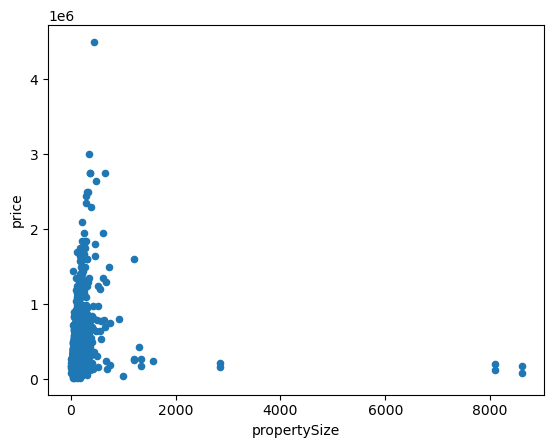

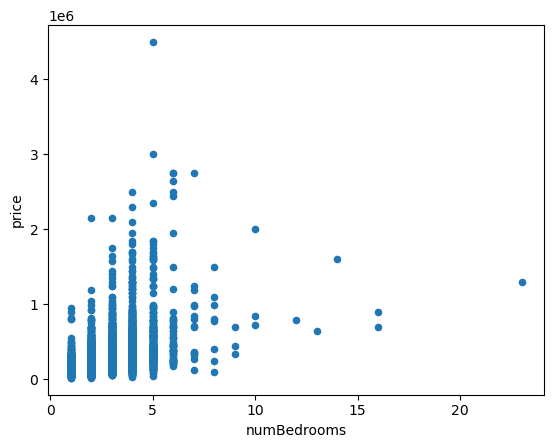

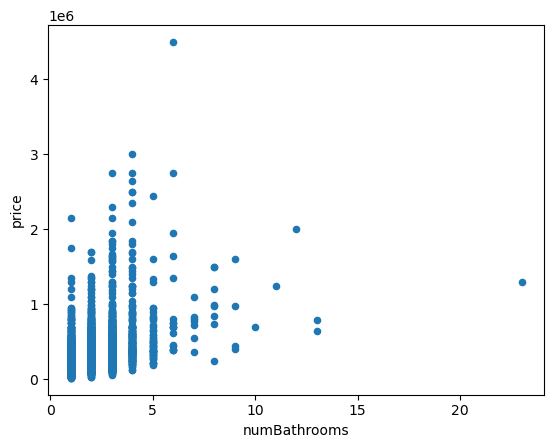

In [429]:
# plot scatter to check house / price
df[["propertySize", "price"]].plot(x="propertySize", y="price", kind="scatter")
df[["numBedrooms", "price"]].plot(x="numBedrooms", y="price", kind="scatter")
df[["numBathrooms", "price"]].plot(x="numBathrooms", y="price", kind="scatter")

The higghest correlations are bedrooms and bathrooms, property size doesnt seem to influence as much. 
<p>Of course we are looking for the for the data of the whole countri, once we start to segragate the data we might have a better undestanding</p>